<h1 align="center">
    NSDC Data Science Projects
</h1>

<h2 align="center">
    Project: COVID-19 Image Classification using Capsule Networks
</h2>

<h3 align="center">
    Name: hellosmallkat</h3>

### **Project Description**

The NSDC DSPs provide virtual collaboration and networking opportunities for data science learners of all ages and skill levels, aiming to develop new data pre-processing, machine learning, and programming skills.

In this project, we will explore the application of Capsule Networks for the classification of COVID-19 images. Capsule Networks are a type of neural network that are particularly effective in recognizing spatial hierarchies in images, which is crucial for medical imaging tasks.

We will work with a dataset of chest X-ray images to develop a classification model that can distinguish between COVID-19 positive and negative cases. This project will involve data preprocessing, model building, training, and evaluation, as well as visualization and interpretation of the results.

Our goal is to equip you with the skills needed to implement advanced neural network architectures and apply them to real-world medical imaging challenges.


**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive.

Please rename the file to "COVID19_Image_Classification_Capsule - Your Full Name." Once this project is completed, you will be prompted to share your file with the National Student Data Corps (NSDC) Project Leaders.

The notebook is provided with blanks "_________" and a comment instructing you on what needs to be done. You need to fill the space with the correct code to make sure you get the desired output.

You can now start working on the project. :)


### **Goals**

- **Data Preprocessing**: Clean and prepare the dataset of chest X-ray images.
- **Model Building**: Implement a Capsule Network architecture.
- **Model Training and Evaluation**: Train the model and evaluate its performance.
- **Visualization and Interpretation**: Visualize the results and interpret the model's predictions.

### **Tools and Libraries**

- **Python**: Programming language
- **NumPy**: Numerical computing
- **Pandas**: Data manipulation
- **TensorFlow/Keras**: Deep learning framework
- **Matplotlib/Seaborn**: Data visualization
- **OpenCV**: Image processing

### **Data Preprocessing**

In this section, we will load the dataset of chest X-ray images and perform the necessary preprocessing steps. This includes resizing images, normalizing pixel values, and augmenting the data to improve model performance.

**Steps:**
1. Load the dataset.
2. Resize the images to a uniform size.
3. Normalize the pixel values.
4. Apply data augmentation techniques.

# Milestone 1: Data Preprocessing

### Task 1.1: Load the Dataset
- Download and load the chest X-ray image dataset.
- Import necessary libraries.

**Resources**:
- [How to Load and Preprocess Images in Python](https://www.tensorflow.org/tutorials/load_data/images)
- [Pandas Documentation](https://pandas.pydata.org/docs/)

In [ ]:
# Step 1: Setting up the environment
!pip install kaggle

### Task 1.2: Steps to Generate `kaggle.json`

1. **Log in to Kaggle**: Go to [Kaggle](https://www.kaggle.com/) and log in.
2. **Account Settings**: Go to **Account** from your profile.
3. **Create API Token**: Click **"Create New API Token"** to download `kaggle.json`.
4. **Move File**: Place `kaggle.json` in `~/.kaggle/` (local) or upload it in Google Colab.
5. **Set Permissions** (Linux/MacOS): Run `chmod 600 ~/.kaggle/kaggle.json`.
6. **Authenticate**: Use it to authenticate with Kaggle API.

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Step 2: Authenticate with Kaggle and download the dataset
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Authenticate with Kaggle
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset = 'tawsifurrahman/covid19-radiography-database'
path = 'covid19-radiography-database'
api.dataset_download_files(dataset, path=path, unzip=True)

# Verify the files
for dirpath, dirnames, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirpath, filename))

In [ ]:
# Step 3: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import shutil

### Task 1.3: Organize the dataset into train and test directories
- Explore the Dataset: Explore the dataset to understand its structure and contents.
- Organise them into train and test directory.
- Split the data in train (80%) and test (20%)

In [ ]:
# Step 4: Organize the dataset into train and test directories
def create_dataset_folders(base_path):
    # Define paths
    dataset_path = os.path.join(base_path, 'COVID-19_Radiography_Dataset')
    classes = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']

    for cls in classes:
        class_path = os.path.join(dataset_path, cls, 'images')
        images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith('.png')]

        train_imgs, test_imgs = train_test_split(images, test_size=__________, random_state=42)

        for img_set, folder in zip([train_imgs, test_imgs], ['train', 'test']):
            folder_path = os.path.join(base_path, folder, cls)
            os.makedirs(folder_path, exist_ok=True)
            for img in img_set:
                shutil.copy(img, folder_path)

create_dataset_folders(path)

### Task 1.4: Data Augmentation
- Use ImageDataGenerator to rescale the image data and apply transformations like shear (20%), zoom (20%), and horizontal flip (True) for the training set.
- For the test set, only rescale the image data without augmentation.

- Image Resizing and Normalization
  - Resize the images to a uniform size and normalize the pixel values to prepare them for model training.
  - Resize images to target dimensions (e.g., 224x224 pixels)

**Resources**:
- [Image Preprocessing for Deep Learning](https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/)
- [Data Augmentation using ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [ ]:
# Step 5: Perform data augmentation

train_dir = os.path.join(path, 'train')  # Path to the training directory
test_dir = os.path.join(path, 'test')  # Path to the test directory

train_datagen = ImageDataGenerator(
    rescale=__________,  # Rescale pixel values (e.g., 1./255 for normalization)
    shear_range=__________,  # Apply shear transformation (e.g., 20%)
    zoom_range=__________,  # Apply zoom transformation (e.g., 20%)
    horizontal_flip=__________  # Randomly flip images horizontally (True/False)
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale test data (normalize pixel values)


train_generator = train_datagen.flow_from_directory(
    __________,  # Path to training directory
    target_size=(__________, __________),
    batch_size=__________,  # Specify the batch size (e.g., 32)
    class_mode=__________  # Mode for classifying multi-class data (e.g., 'categorical')
)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to test directory
    target_size=(224, 224),
    batch_size=32,  # Batch size of 32 for testing
    class_mode='categorical'  # Mode for multi-class classification
)


# Milestone 2: Model Building
### Task 2.1: Define Capsule Network Architecture
- Implement the Capsule Network model architecture using Keras, defining layers such as Convolution, Primary Capsule, and Digit Capsule.


**Model Architecture:**
- **Conv2D Layer 1**: 32 filters, 3x3 kernel size, ReLU activation, input shape of (224, 224, 3) (image size: 224x224x3 channels)
- **MaxPooling2D Layer 1**: Pool size 2x2
- **Conv2D Layer 2**: 64 filters, 3x3 kernel size, ReLU activation
- **MaxPooling2D Layer 2**: Pool size 2x2
- **Conv2D Layer 3**: 128 filters, 3x3 kernel size, ReLU activation
- **MaxPooling2D Layer 3**: Pool size 2x2
- **Flatten Layer**: Flatten the input to a 1D vector
- **Dense Layer 1**: 512 units, ReLU activation
- **Dropout Layer**: Drop 50% of units to prevent overfitting
- **Dense Output Layer**: 4 units, Softmax activation (for multi-class classification)

**Resources**:
- [Keras Sequential Model Documentation](https://keras.io/guides/sequential_model/)
- [Keras Conv2D Layer Documentation](https://keras.io/api/layers/convolution_layers/convolution2d/)
- [Keras Pooling Layers Documentation](https://keras.io/api/layers/pooling_layers/max_pooling2d/)
- [Building CNNs with Keras - A Practical Guide](https://www.tensorflow.org/tutorials/images/cnn)
- [Dense Layer Documentation](https://keras.io/api/layers/core_layers/dense/)
- [Dropout Layer Documentation](https://keras.io/api/layers/regularization_layers/dropout/)

In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 6: Build the model
model = Sequential([
    Conv2D(__________, (__________, __________), activation='__________', input_shape=(__________, __________, __________)),  # Convolution layer 1
    MaxPooling2D((__________, __________)),  # MaxPooling layer 1
    Conv2D(__________, (__________, __________), activation='__________'),  # Convolution layer 2
    MaxPooling2D((__________, __________)),  # MaxPooling layer 2
    ____________,
    ...
    ..
    Dense(__________, activation='__________')  # Output layer
])

### Task 2.2: Compile the Model
- Set up the loss function and optimizer, compile the model, and prepare it for training.

Compile the model with the following:
- Optimizer: Adam (or specify another optimizer if needed)
- Loss function: Categorical crossentropy (for multi-class classification)
- Metrics: Accuracy (to track model performance)

**Resources**:
- [Keras Model Compilation](https://keras.io/guides/training_with_built_in_methods/)
- [Optimizer Guide in PyTorch](https://pytorch.org/docs/stable/optim.html)

In [ ]:
# Step 7: Compile the model

model.compile(optimizer='__________', loss='__________', metrics=[__________])

# Milestone 3: Model Training and Evaluation

### Task 3.1: Train the Model
- Train the Capsule Network on the training dataset and monitor performance on the validation set.

**Resources**:
- [Training Neural Networks with Keras](https://keras.io/getting_started/intro_to_keras_for_engineers/)
- [Training a Model with PyTorch](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)

In [ ]:
# Step 8: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=__________,  # Number of training epochs (e.g., 20) feel fee to play with different epochs and check what works best
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

### Task 3.2: Evaluate the Model
- Calculate the test accuracy

In [ ]:
# Step 9: Evaluate the model

test_loss, test_acc = model.evaluate(
    __________,  # The test data generator (e.g., test_generator)
    steps=__________ // __________  # Number of steps (total test samples // batch size)
)
print(f"Test Accuracy: {test_acc}")

# Milestone 4: Visualization and Interpretation

Visualize the model's performance through various plots and interpret the results to understand how well the model is distinguishing between COVID-19 positive and negative cases.

### Task 4.1: Visualize Model Performance
- Plot training and validation accuracy/loss curves to assess overfitting or underfitting.
- Generate a confusion matrix to visualize the classification performance.

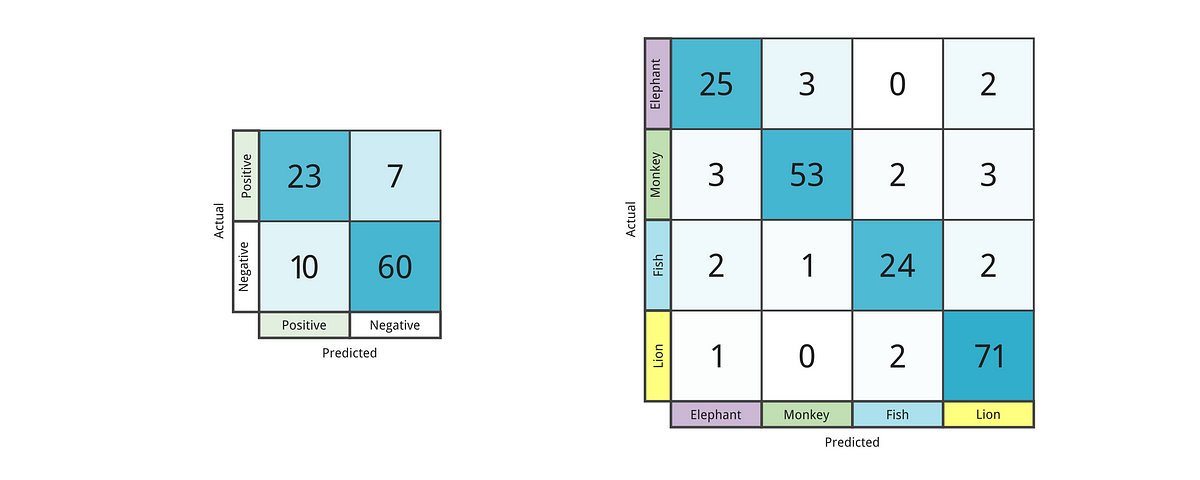

Image [Reference](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fvisual-guide-to-the-confusion-matrix-bb63730c8eba&psig=AOvVaw2KF5lYrmCcGG5F--Ysjabb&ust=1725736703725000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCKjWkauEr4gDFQAAAAAdAAAAABAS)

**Resources**:
- [Confusion Matrix in Machine Learning](https://www.w3schools.com/python/python_ml_confusion_matrix.asp)
- [Precision, Recall, and F1-Score Explained](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Scikit-learn Model Evaluation Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [ ]:
# Step 10: Generate classification report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

### Task 4.2: Interpret Model Predictions
- Look at a few cases where the model succeeded or failed, interpreting the model's output to understand its decision-making process.

Extract the following from the training history:
- Training accuracy
- Validation accuracy
- Training loss
- Validation loss

**Resources:**
- [Visualizing Neural Network Training with Matplotlib](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

In [ ]:
# Step 11: Plot the training and validation accuracy and loss

acc = history.history['__________']  # Training accuracy
val_acc = history.history['__________']  # Validation accuracy
loss = history.history['__________']  # Training loss
val_loss = history.history['__________']  # Validation loss

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### **Conclusion**

In this project, we implemented a Capsule Network to classify chest X-ray images into COVID-19 positive and negative categories. We explored various aspects of the model's performance through detailed analysis and visualization. This project demonstrates the potential of advanced neural network architectures in medical imaging and highlights the importance of accurate and reliable diagnostic tools in the fight against COVID-19.

### **Final Submission**
Thank you for completing the project!
Please submit all materials to the NSDC HQ team at er3101@columbia.edu in order to receive a virtual certificate of completion. Do reach out to us if you have any questions or concerns. We are here to help you learn and grow.

### **Acknowledgments and Next Steps**

Thank you for completing this project! If you have any questions or need further assistance, feel free to reach out.

For the next steps, consider experimenting with different neural network architectures or applying this approach to other medical imaging datasets. The skills and knowledge gained from this project can be extended to various real-world challenges in healthcare and beyond.

Happy Coding!